# Generating input files necessary for the simulation
#### These files need to be generated for the main simulation. 

All you need to define is number of rows, columns, and if you want, number of time points T (min 3), average deme size N, and batch name - all your input files will use this batch name as prefix. 

### Demographic history

This file contains demographic history of the simulated population. It contains T rows (T different time points) of sub-populations sizes for each cell in the grid (rows x columns). Empty cells have sub-populations of size 0.
Function  generate_basic_homogenous_static(rows, cols, pop=10, time=3, batch_name='') generates T identical rows with population sizes N for the grid (rows x cols). It also makes a figure - map of the final time point (presence)
Saved into batch_name+'HomogFixedDataT'+str(T)+'Row'+str(rows)+'Col'+str(cols)+'N'+str(N)+'.txt'

Function generate_fixed_data(rows, cols, T, N,  batch_name=''): generates T identical rows with population sizes for the grid (rows x cols) drawn from uniform distribution with mean N (from 0 to 2N) and saves it into 
batch_name_dataT[T]Row[rows]Col[cols]N[N].txt'

### Migration list

Migration list with constant forward migration is generated, assuming that demes that share an edge are symmetrically connested with migration m. 
Migration list is saved to a file 'batch_name_mig_list[m].txt, as source cell, target cell, migration rate. By default migration rate is specified to 0.1. 

### Ancestral population list
This list contains information about the source population for each cell. Function generate_ancestral_pop(row, col, batch_name='') generates a vector of 1 (all sub-populations originating in a single population), saving it to 'batch_name_anc_pop.tsv'. 

### Sample list
Function generate_sample_list(rows, cols,s=0.1, batch_name='') randomly samples fraction s of all cells without repetition (2 samples are taken from each sampled grid cell by gridCoal simulator). Note that some of the sampled cells may be emptied at the final time point, resulting in an error. If no sample list is specified for gridCoal, it automatically samples all non-zero cells. 






In [1]:
import csv
import numpy as np
import timeit
from pathlib import Path
import random
import matplotlib.pyplot as plt
%matplotlib inline  

In [59]:
rows = 5   #number of rows
cols = 4   #number of columns
T = 10 #number of time steps
gt=2  #generation time
dt=20 # time between defined time steps
N=10  #average population size
mu=0.1 #migration rate between neighbouring demes
s = 0.5 # s is coverage - fraction of sampled grid cells. Note that using this function may include 
#some that are empty in the input data, which will cause error. Check before submitting for simulations. 

batch_name = 'example_simple_exp_'  #prefix used for input data associated with this simulation

[[ 2  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  0  1  1  1]
 [ 3  2  2  3  1  2  2  3  3  1  2  2  1  2  2  3  1  2  3  3]
 [ 5  3  3  4  2  3  4  4  4  2  2  2  2  3  3  4  2  2  4  4]
 [ 7  4  4  5  2  4  5  5  6  3  3  3  2  4  4  6  2  3  6  6]
 [ 8  5  4  6  3  5  6  6  7  4  4  4  3  5  5  8  2  4  7  7]
 [10  6  5  8  4  6  7  8  8  4  5  5  4  6  6  9  3  5  8  8]
 [12  7  6  9  4  7  8  9 10  5  6  6  4  7  7 10  4  6 10 10]
 [14  8  7 10  5  8 10 10 11  6  6  6  5  8  8 12  4  6 11 11]
 [15  9  8 12  5  9 11 12 13  6  7  7  5  9  9 14  4  7 13 13]
 [17 10  9 13  6 10 12 13 14  7  8  8  6 10 10 15  5  8 14 14]]
[[17 10  9 13  6 10 12 13 14  7  8  8  6 10 10 15  5  8 14 14]
 [17 10  9 13  6 10 12 13 14  7  8  8  6 10 10 15  5  8 14 14]
 [17 10  9 13  6 10 12 13 14  7  8  8  6 10 10 15  5  8 14 14]
 [17 10  9 13  6 10 12 13 14  7  8  8  6 10 10 15  5  8 14 14]
 [17 10  9 13  6 10 12 13 14  7  8  8  6 10 10 15  5  8 14 14]
 [17 10  9 13  6 10 12 13 14  7  8  8  6 10 10 15  5  

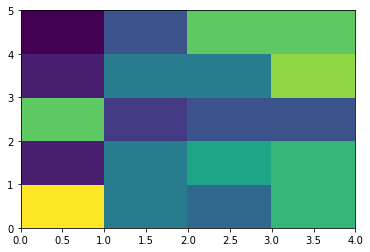

In [63]:
final_map = generate_final_map(rows, cols, N)   #generate final map
my_demography=generate_lin_increase_data(final_map, T, batch_name)  #generate linear increasing pop sizes leading to final map
my_demography2=generate_static(final_map, T, batch_name)  #generate static demography for the given map
print (my_demography)

print (my_demography2)


mig_list= generate_migration_list(rows, cols, mu, batch_name)
print (mig_list)

sample_list=generate_sample_list(rows, cols,0.5, batch_name)
print (sample_list)

ancpop_list=generate_ancestral_pop(rows, cols, batch_name=batch_name )
print (ancpop_list)

In [20]:
def generate_final_map(rows, cols, N):
    ## this function can generate 3 types of final map, with individual deme sizes drawn from uniform 
    ## or Poisson distribution, or homogenous map with equal sized demes. It also plots the map. 
    
    #final_map=np.around(np.random.uniform(0,2*N,[rows*cols]))  #data drawn from uniform distribution
    final_map=np.around(np.random.poisson(N,[rows*cols]))      #data drawn from poisson distribution
    #final_map=[N]*(cols*rows)                                  #homogenous map
    final_map_2D=np.reshape(final_map, [rows, cols])
    plt.pcolor(final_map_2D)
    return (final_map)
    
    

In [43]:
def generate_lin_increase_data(final_map, T, batch_name=''):
    ## this function generates linear increase from size 1 to the final map over T time points
    demography_data=[]
    for i in range (T):
        this_timepoint=np.around((1.0+i)*final_map/T)
        demography_data.append(this_timepoint)
    demography_data=np.array(demography_data)
    np.savetxt(batch_name+'_lin_inc_N_'+str(N)+'.txt', my_demography,  fmt='%1d', delimiter='\t')

    return (demography_data.astype(int))
    


In [44]:
def generate_static(final_map, T, batch_name=''):
    ## this function generates static demograhy for a final map over T time points
    demography_data=[]
    for i in range (T):
        this_timepoint=final_map.copy()
        demography_data.append(this_timepoint)
    demography_data=np.array(demography_data)
    np.savetxt(batch_name+'static_N_'+str(N)+'.txt', my_demography,  fmt='%1d', delimiter='\t')

    return (demography_data.astype(int))


In [50]:
def generate_migration_list(rows, cols, m=0.1, batch_name=''):
    n = rows*cols
    add_mat = np.zeros([n,n])
    for r in range(rows):
        for c in range(cols):
            i = r*cols + c
            # Two inner diagonals
            if c > 0: add_mat[i-1,i] = add_mat[i,i-1] = 1
            # Two outer diagonals
            if r > 0: add_mat[i-cols,i] = add_mat[i,i-cols] = 1
    m_list=[]
    for i in range(n):
        for j in range (n):
            if add_mat[i,j]==1:
                m_list.append([int(i),int(j),m])
    m_list=np.array(m_list) 
    np.savetxt(batch_name+'mig_list'+str(m)+'.txt', m_list, fmt= ['%i','%i','%4.2e'])
    return m_list
 
#generate_migration_list(rows, cols, m=0.1, batch_name=batch_name )

In [58]:
def generate_sample_list(rows, cols,s=0.5, batch_name=''):
    
    grid_size=rows*cols
    samples=int(grid_size*s)
    mr=range(0,grid_size,1)
    sample_list= (random.sample(range(0,grid_size,1), samples))
    sample_list.sort()
    np.savetxt(batch_name+'sample_list.txt',sample_list,  fmt='%1d', delimiter='\t')
    return sample_list


In [62]:
def generate_ancestral_pop(rows, cols, batch_name=''):
    ancestral_pop=[]
    for i in range(rows*cols):
        ancestral_pop.append(1)
    np.savetxt(batch_name+'anc_pop.txt', ancestral_pop, fmt= '%i')
    return ancestral_pop


# STOP HERE

In [45]:
def generate_all_sample_list(grid_size, dem_data, batch_name=''):
    data_input = np.loadtxt(dem_data)
    today=data_input[-1, :]
    samplelist=[]
    for i in range(grid_size):
        if today[i]>0:
            samplelist.append(i)
    samplelist=np.array(samplelist)
    print (samplelist)
    
    np.savetxt(batch_name+'sample_list_all.tsv',samplelist,  fmt='%1d', delimiter='\t')
    return samplelist


In [47]:
generate_all_sample_list(24*53, dem_data='fir_A_shape.tsv', batch_name='fir')

[   1    2    3    4    5    6    7    8    9   10   11   12   13   14
   20   21   22   23   24   25   31   32   33   34   46   47   51   52
   55   56   57   58   59   60   61   62   63   64   65   66   67   68
   69   70   71   72   73   74   75   99  100  101  102  103  104  105
  110  111  112  113  114  115  116  117  118  119  120  121  122  123
  124  125  126  127  149  150  152  153  154  155  156  157  158  164
  165  166  167  168  169  170  171  172  173  174  175  176  177  178
  179  180  193  194  195  202  203  205  206  207  208  209  210  211
  216  217  218  219  220  223  224  225  226  227  228  229  230  231
  232  233  237  245  250  251  252  253  254  255  256  257  258  259
  260  261  262  263  264  267  268  269  270  271  272  273  274  275
  282  285  288  289  290  291  296  297  298  299  300  301  302  303
  304  305  306  307  308  309  310  311  312  313  314  315  316  317
  319  320  321  322  323  324  325  326  327  328  329  330  337  342
  343 

array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   14,   20,   21,   22,   23,   24,   25,   31,   32,
         33,   34,   46,   47,   51,   52,   55,   56,   57,   58,   59,
         60,   61,   62,   63,   64,   65,   66,   67,   68,   69,   70,
         71,   72,   73,   74,   75,   99,  100,  101,  102,  103,  104,
        105,  110,  111,  112,  113,  114,  115,  116,  117,  118,  119,
        120,  121,  122,  123,  124,  125,  126,  127,  149,  150,  152,
        153,  154,  155,  156,  157,  158,  164,  165,  166,  167,  168,
        169,  170,  171,  172,  173,  174,  175,  176,  177,  178,  179,
        180,  193,  194,  195,  202,  203,  205,  206,  207,  208,  209,
        210,  211,  216,  217,  218,  219,  220,  223,  224,  225,  226,
        227,  228,  229,  230,  231,  232,  233,  237,  245,  250,  251,
        252,  253,  254,  255,  256,  257,  258,  259,  260,  261,  262,
        263,  264,  267,  268,  269,  270,  271,  2

In [35]:
T=10
rows=4
cols=5
N=10
batch_name='Test1_'
A= generate_adjacency_matrix(rows, cols)
generate_migration_list(A, m=0.000001, batch_name=batch_name)
generate_migration_list(A, m=1, batch_name=batch_name)
test_data_T=generate_fixed_data(rows, cols, T, N, batch_name=batch_name)
generate_ancestral_pop(rows, cols, batch_name=batch_name)
generate_ancestral_pop_sizes(test_data_T, batch_name=batch_name)
generate_sample_list(batch_name=batch_name)

1e-06
1
(10, 20)


TypeError: generate_sample_list() missing 1 required positional argument: 'grid_size'

In [7]:
def generate_ancestral_pop_sizes(test_data_T=1, batch_name=''):
    if type(test_data_T)==int:
        anc_pop_size=1
        f = open(batch_name+'anc_pop_size_1.tsv', 'w')
        
    else:
        last_datapoint=test_data_T[-1]  #make this changable
        anc_pop_size=sum(last_datapoint)
        f = open(batch_name+'anc_pop_size_sum.tsv', 'w')
    

    f.write(str(anc_pop_size))
    f.close()
    #np.savetxt(batch_name+'anc_pop_size'+str(anc_pop_size)+'.tsv', str(anc_pop_size), fmt= '%i')  # this should be rewritten to count it. 


In [10]:
print (type(test_data_T))

<class 'numpy.ndarray'>


In [25]:
10.1+10.2-20.3


-3.552713678800501e-15